<a href="https://colab.research.google.com/github/ammarello/PrakML/blob/main/Tubes_Machine_Learning_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Color output
from termcolor import colored

In [ ]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a featur
pd.options.mode.copy_on_write = True

sns.set_style('darkgrid') # Seaborn style


print(colored('\nAll libraries configed succesfully', 'green'))


All libraries configed succesfully


In [ ]:
# Input train data
Train = pd.read_csv('/content/train.csv')
Train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
# Input test data
Test = pd.read_csv('/content/test.csv')
Test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [ ]:
# Describe
Train.describe().loc[['min', 'mean', '25%', '50%', '75%', 'max']].T.style.background_gradient(axis=1)

,min,mean,25%,50%,75%,max
battery_power,501.000000,1238.518500,851.750000,1226.000000,1615.250000,1998.000000
blue,0.000000,0.495000,0.000000,0.000000,1.000000,1.000000
clock_speed,0.500000,1.522250,0.700000,1.500000,2.200000,3.000000
dual_sim,0.000000,0.509500,0.000000,1.000000,1.000000,1.000000
fc,0.000000,4.309500,1.000000,3.000000,7.000000,19.000000
four_g,0.000000,0.521500,0.000000,1.000000,1.000000,1.000000
int_memory,2.000000,32.046500,16.000000,32.000000,48.000000,64.000000
m_dep,0.100000,0.501750,0.200000,0.500000,0.800000,1.000000
mobile_wt,80.000000,140.249000,109.000000,141.000000,170.000000,200.000000
n_cores,1.000000,4.520500,3.000000,4.000000,7.000000,8.000000


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

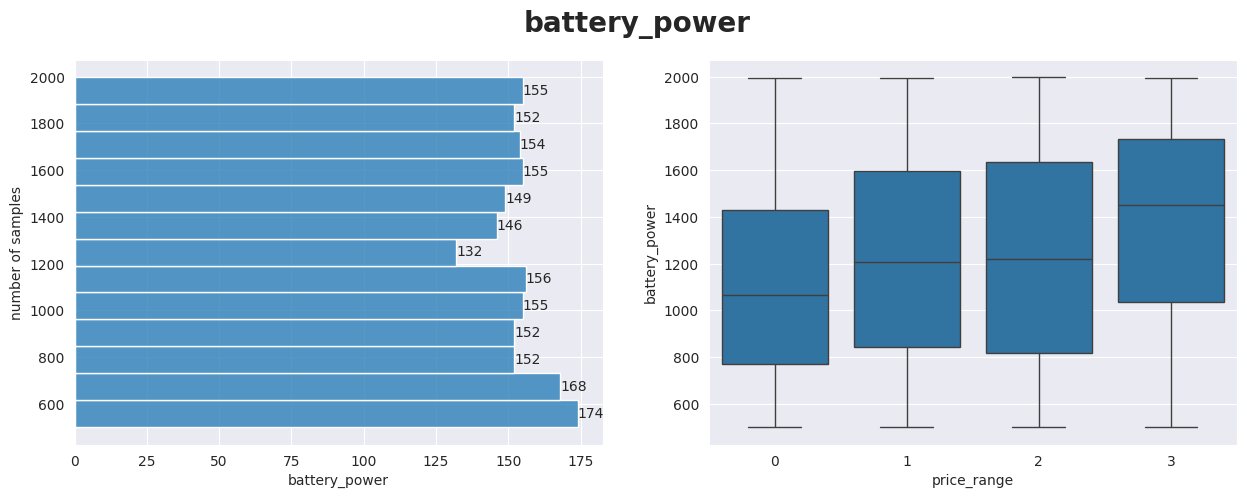

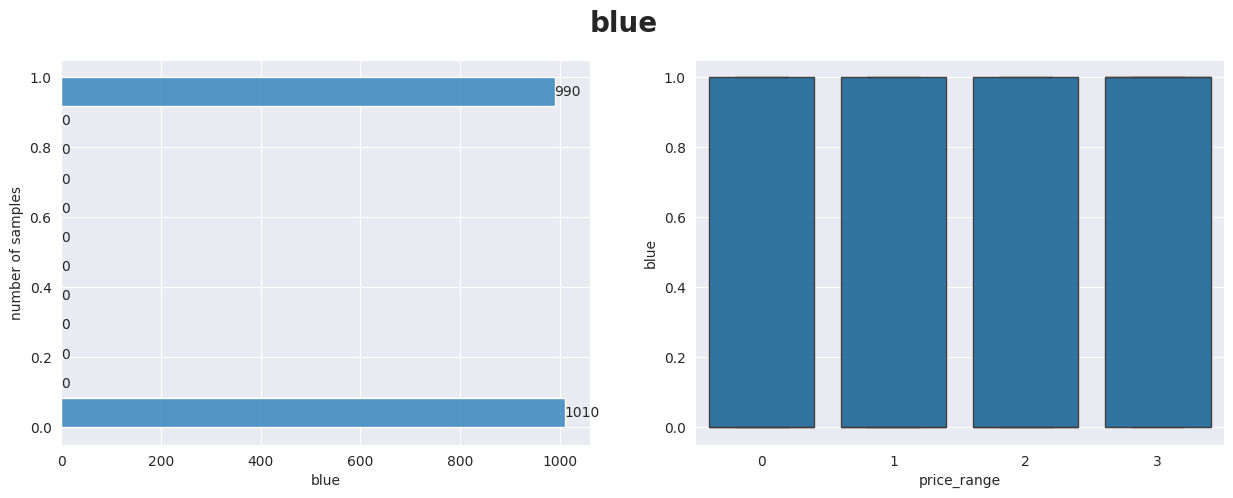

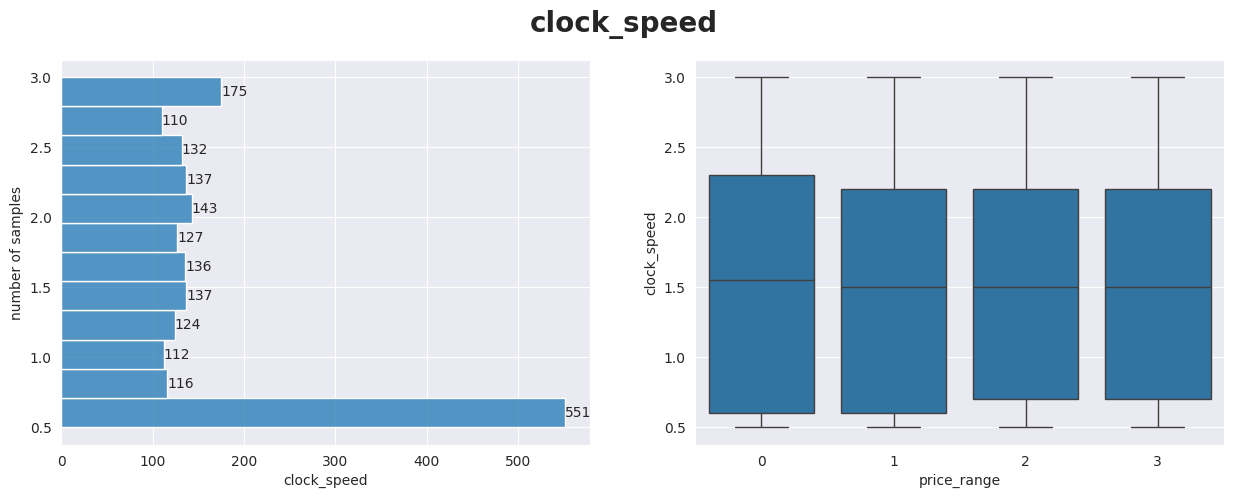

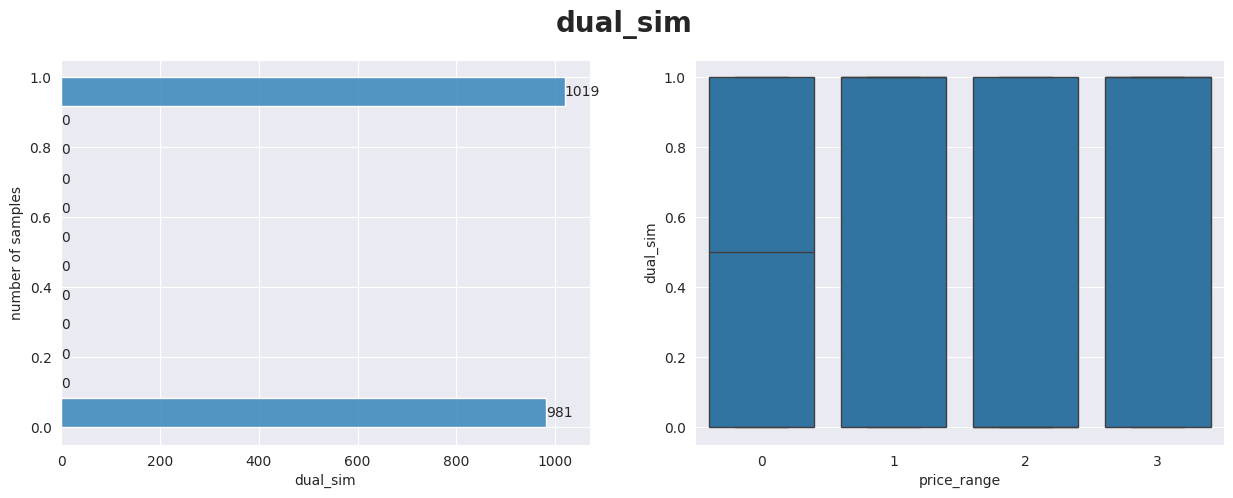

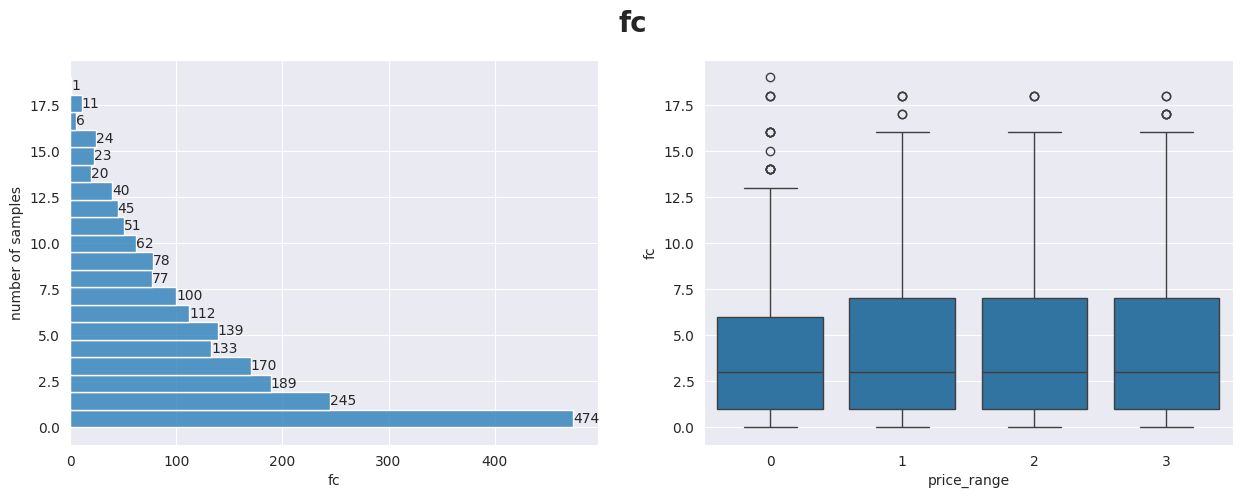

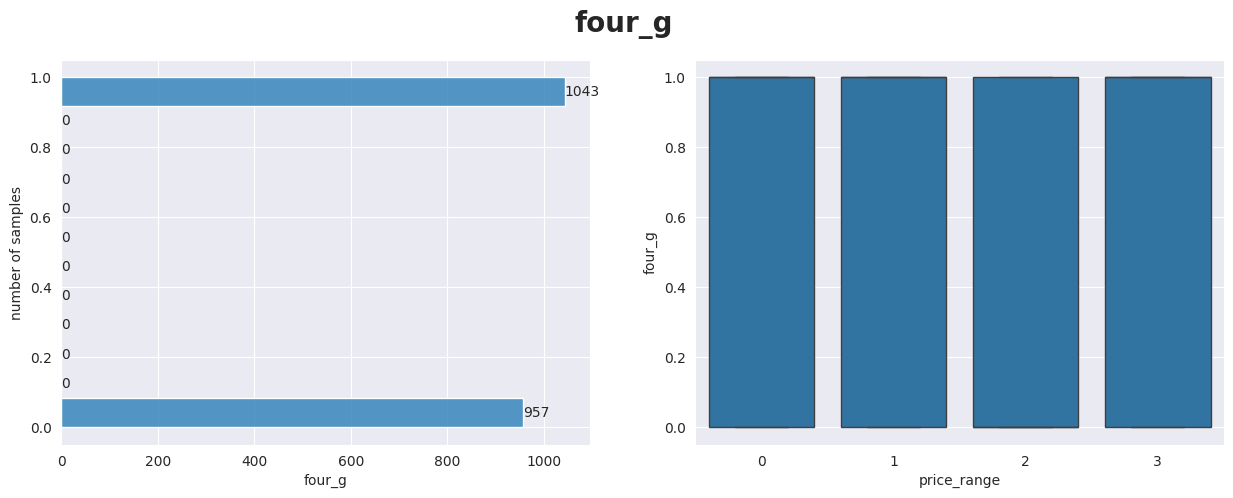

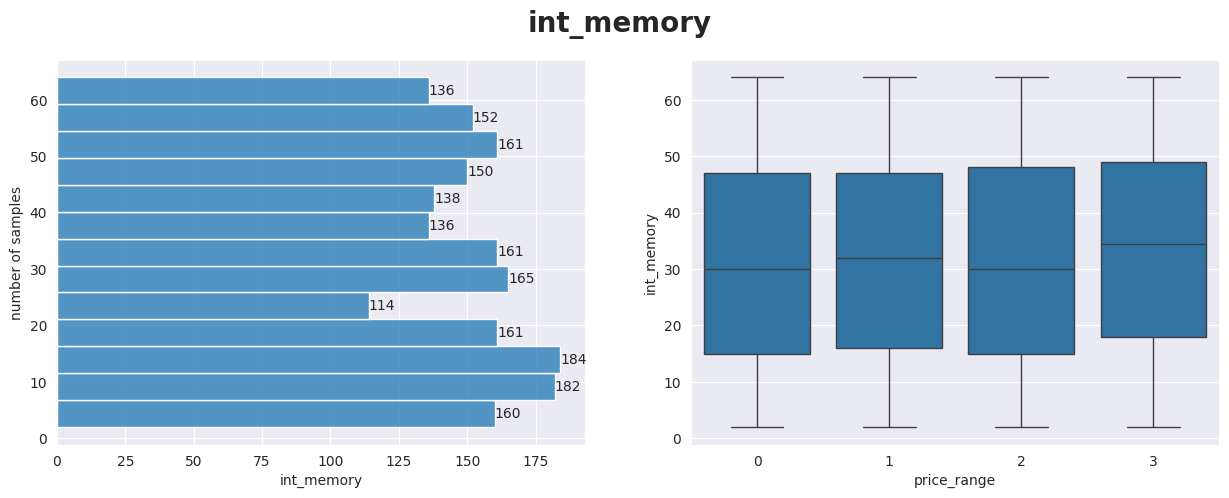

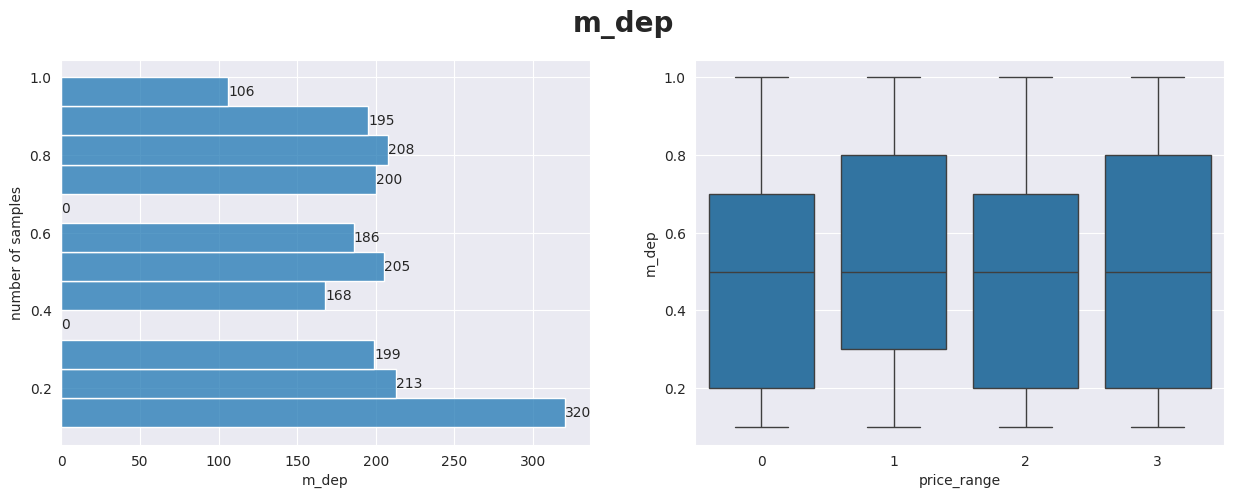

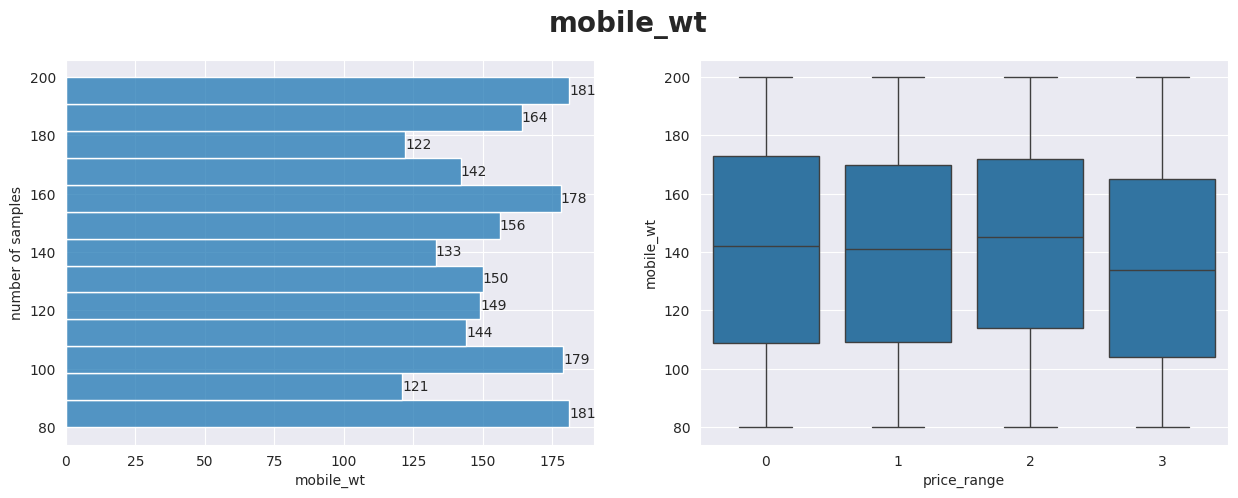

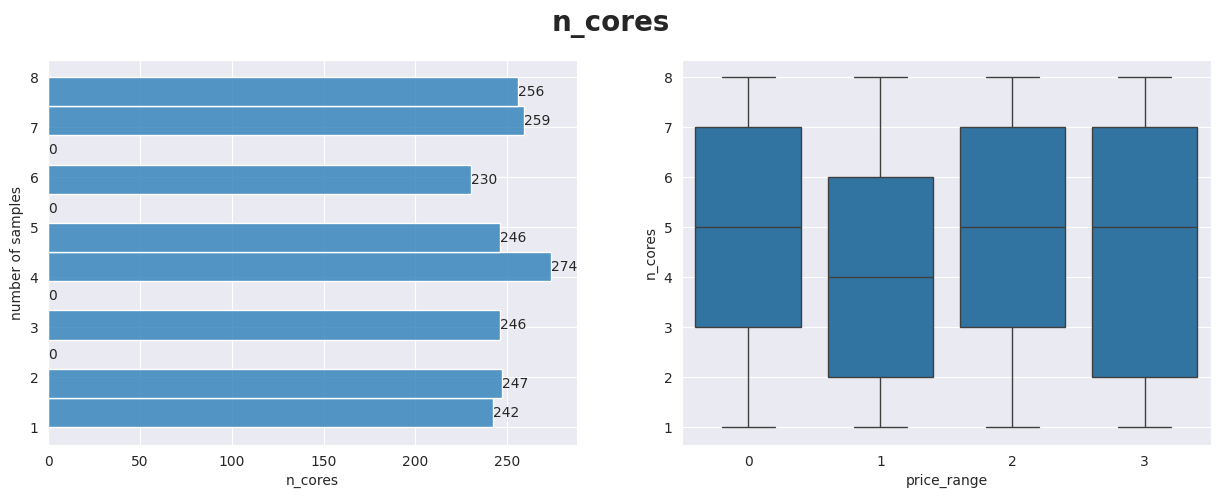

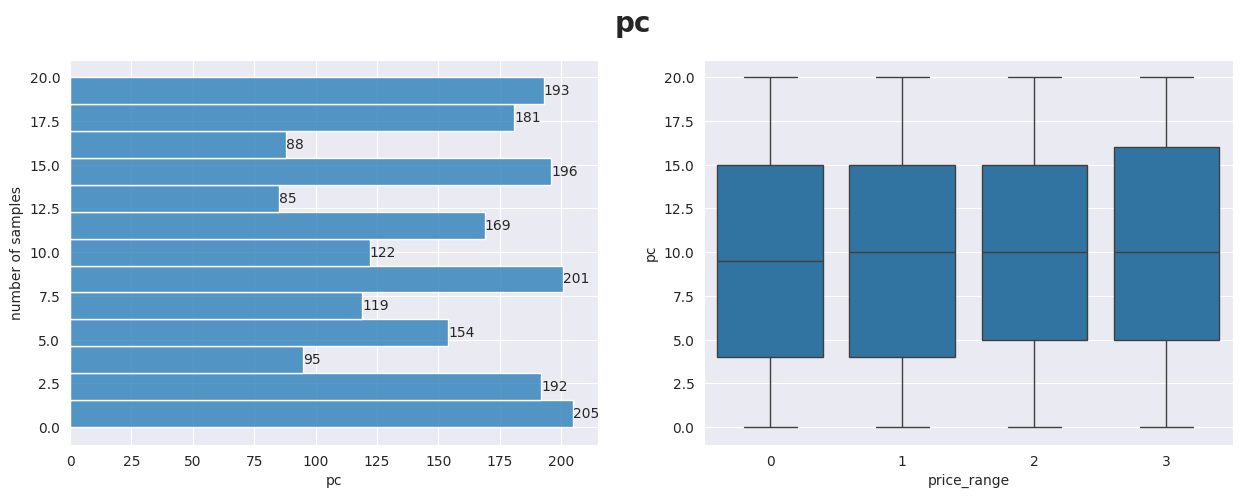

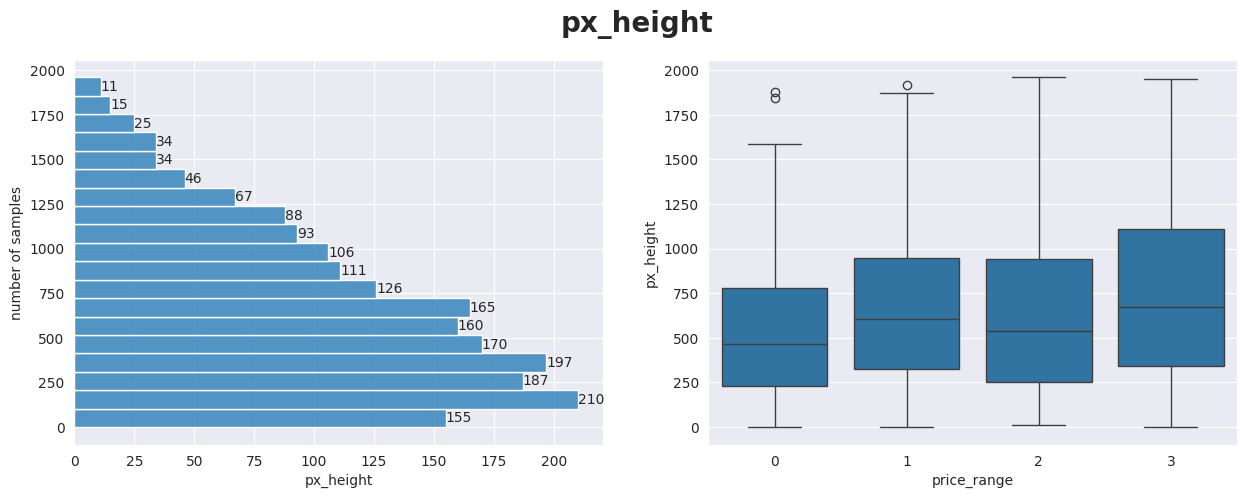

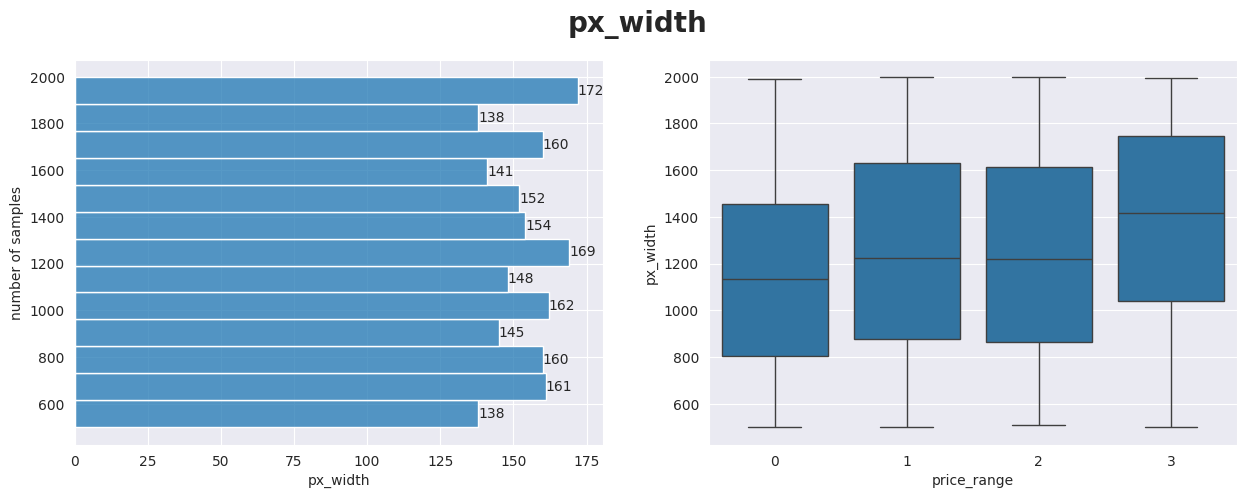

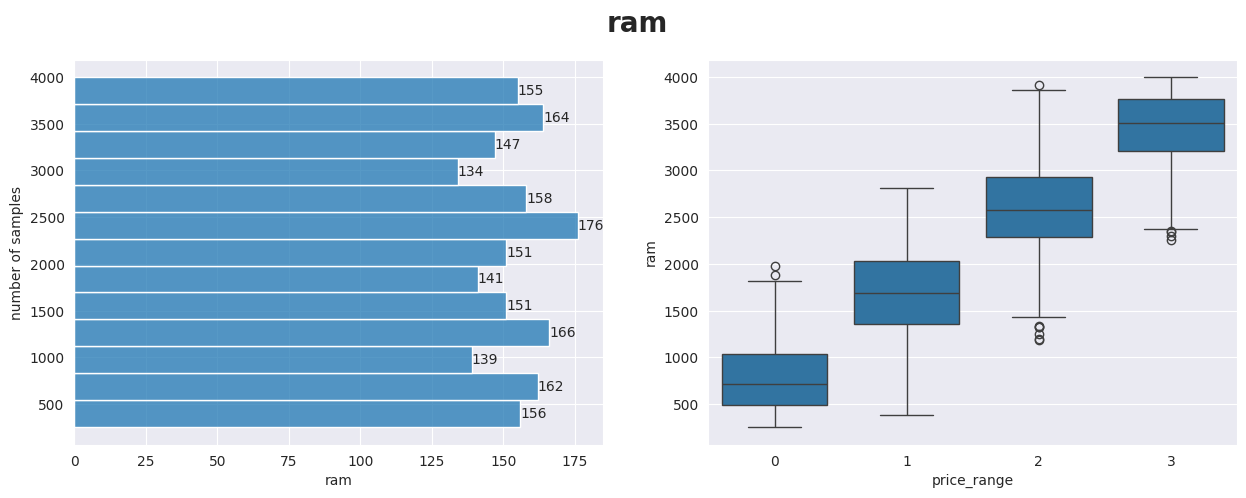

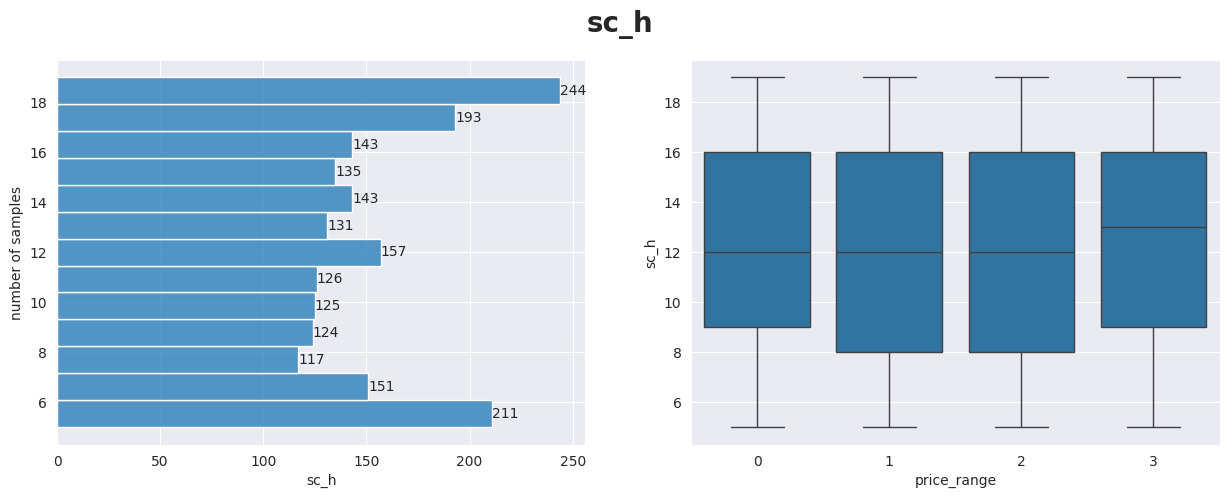

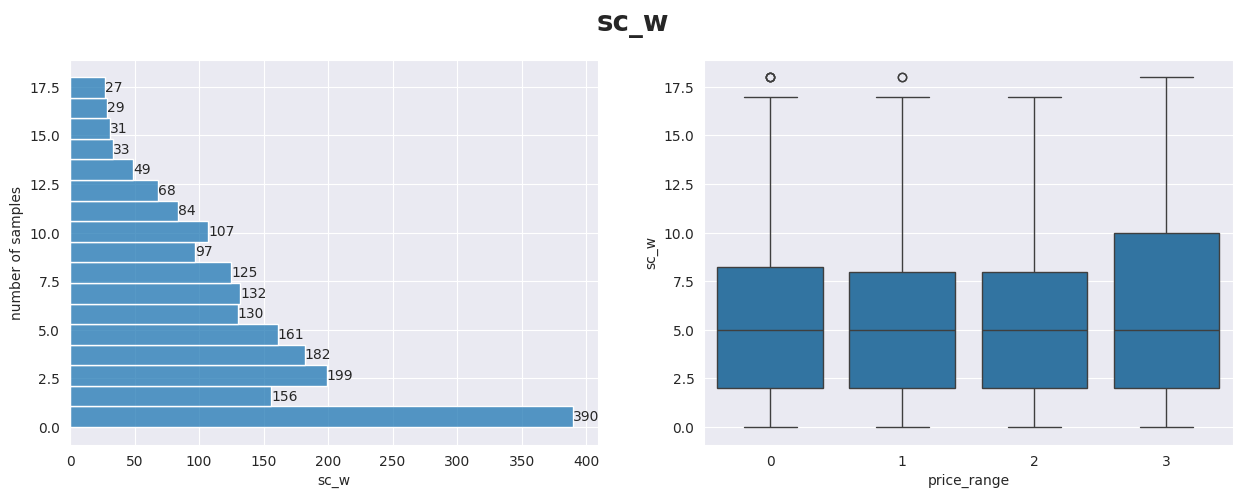

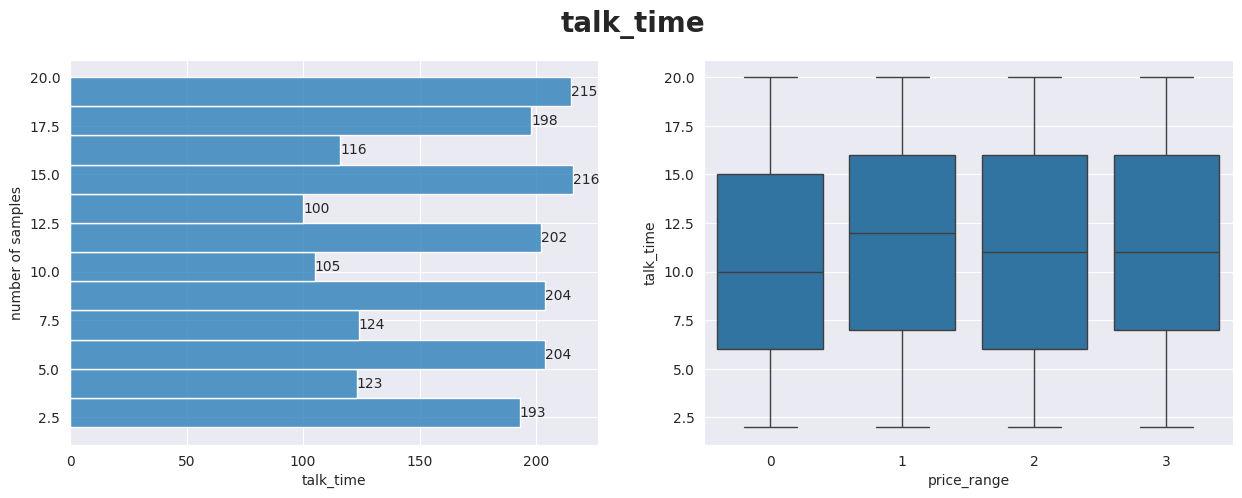

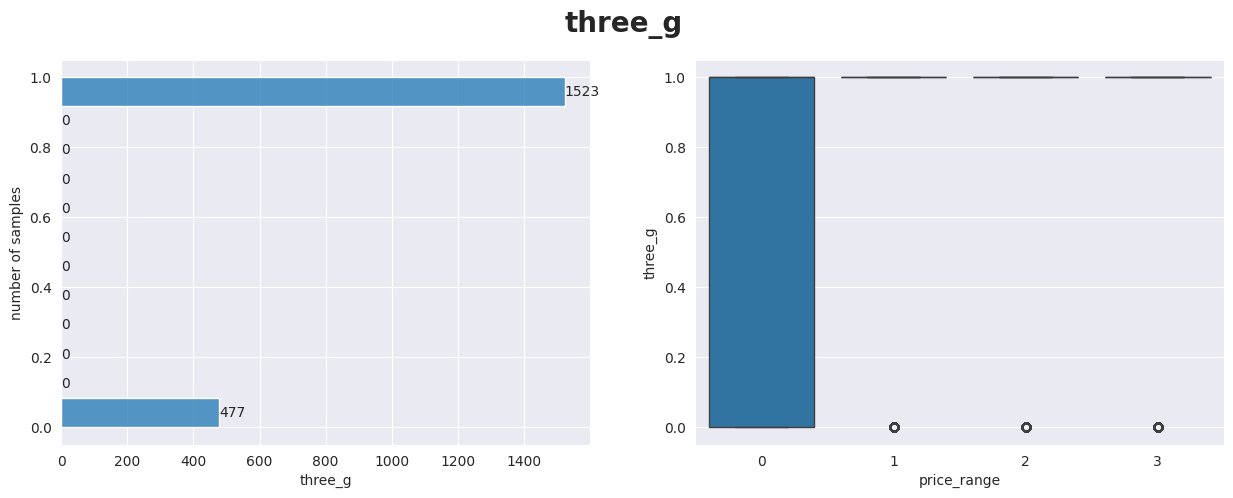

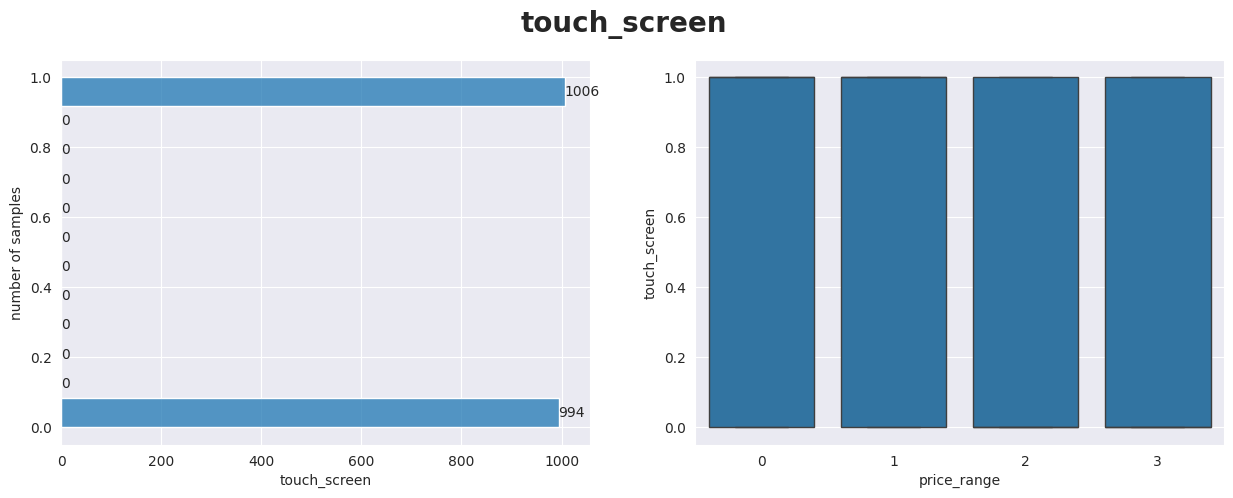

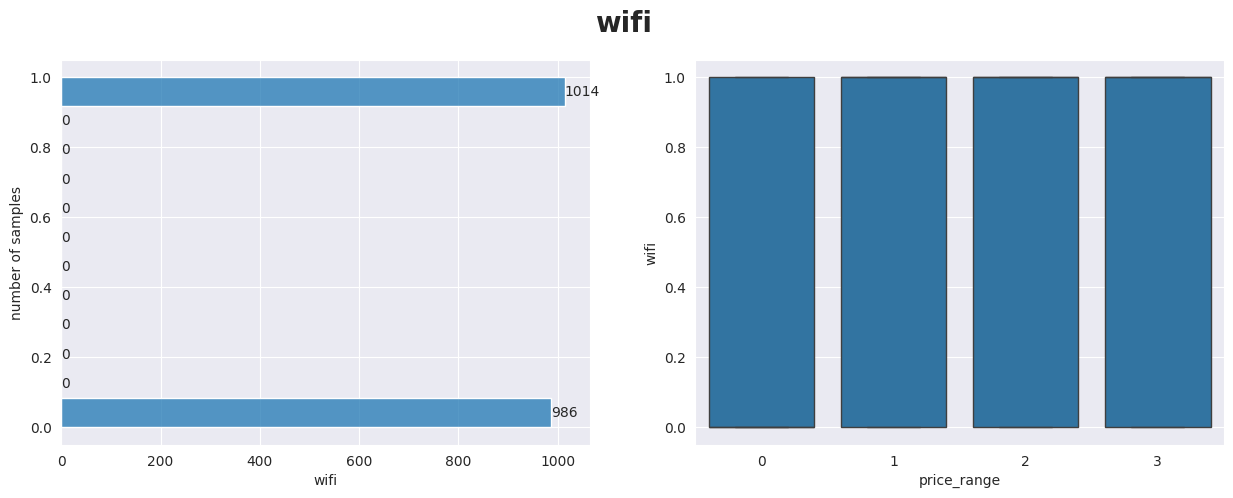

In [ ]:
for col in Train.columns[:-1] :
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(col, fontsize=20, fontweight='bold')
    # Left Ax
    ax0 = sns.histplot(y=col, data=Train, ax=ax[0])
    ax0.bar_label(ax0.containers[0])
    ax0.set(xlabel=col, ylabel='number of samples')
    # Right Ax
    ax1 = sns.boxplot(x='price_range', y=col, data=Train, ax=ax[1])

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


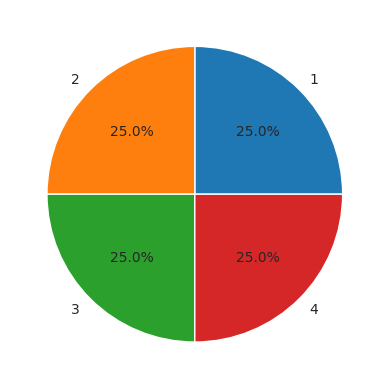

In [ ]:
print(Train.price_range.value_counts())


d = Train[['price_range']]
d = d.groupby('price_range').size()
labels = ['1', '2', '3', '4']
# explode = (0, 0.1)
plt.pie(d, labels=labels, autopct='%1.1f%%')
plt.show()

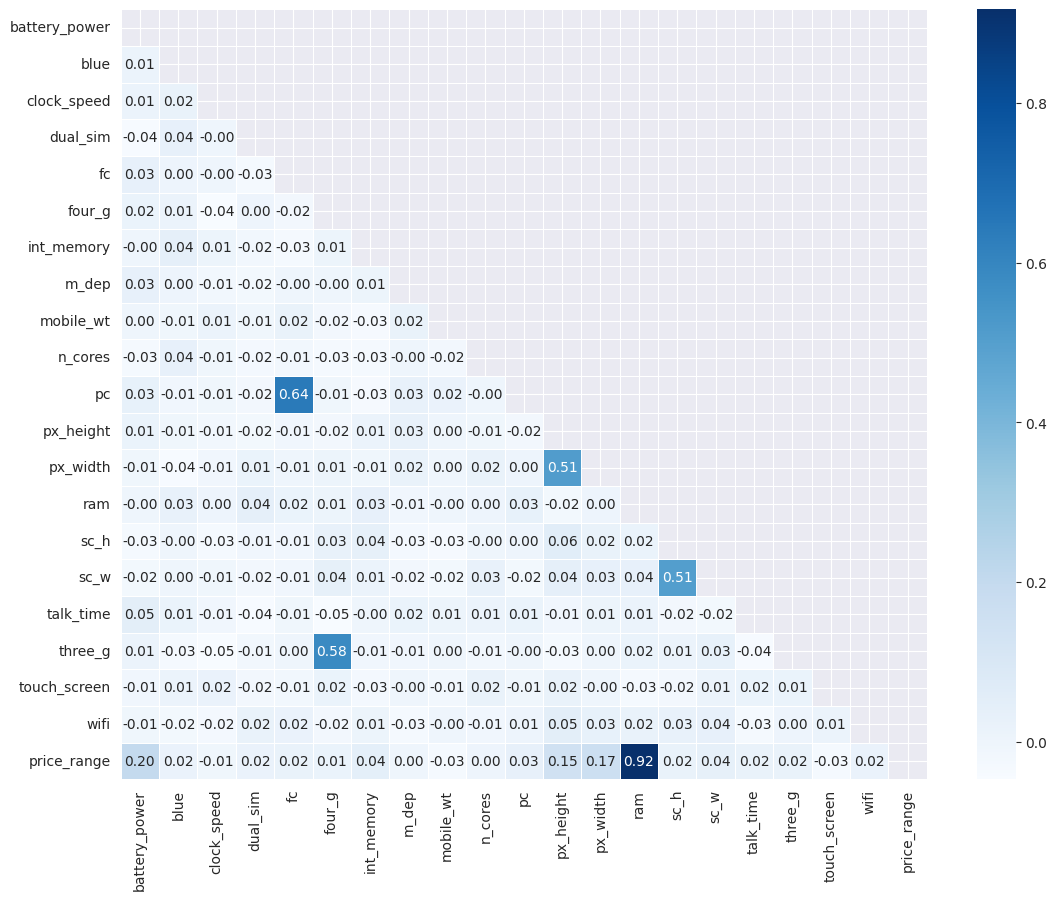

In [ ]:
corr = Train.corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [ ]:
# columns that are/is in Train and doesnt in Test

diff = []
for element in list(Train.columns):
    if element not in list(Test.columns):
        diff.append(element)

print(colored('{} just in Train DataFrame.'.format(diff)))

['price_range'] just in Train DataFrame.


In [ ]:
# columns that are/is in Test and doesnt in Train

diff = []
for element in list(Test.columns):
    if element not in list(Train.columns):
        diff.append(element)

print(colored('{} just in Test DataFrame.'.format(diff)))

['id'] just in Test DataFrame.


In [ ]:
# Drop id in test, its unnessesary
Test.drop(columns='id', inplace=True)

In [ ]:
y_train_full = Train.price_range
Train.drop(columns='price_range', inplace=True)

In [ ]:
Train.columns == Test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
columns = Train.columns

In [ ]:
# Normalize
scaler = preprocessing.StandardScaler()
# Fit data to normalization
Norm_train = scaler.fit_transform(Train)
Norm_test = scaler.transform(Test)
# Convert normalized data to a DataFrame
X_train_full = pd.DataFrame(Norm_train, columns=columns)
X_test = pd.DataFrame(Norm_test, columns=columns)

In [ ]:
X_train_full.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
battery_power,-1.678817,0.000000,1.000250,1.728812
blue,-0.990050,-0.000000,1.000250,1.010051
clock_speed,-1.253064,-0.000000,1.000250,1.811412
dual_sim,-1.019184,0.000000,1.000250,0.981177
fc,-0.992890,0.000000,1.000250,3.384628
four_g,-1.043966,0.000000,1.000250,0.957886
int_memory,-1.656260,-0.000000,1.000250,1.761380
m_dep,-1.393304,-0.000000,1.000250,1.727974
mobile_wt,-1.702391,0.000000,1.000250,1.688320
n_cores,-1.539175,-0.000000,1.000250,1.521249


In [ ]:
x_train,x_test,y_Train,y_Test=train_test_split(X_train_full,y_train_full ,test_size=0.10,random_state=42)

In [ ]:
print("x_train",len(X_train_full))
print("x_test",len(x_test))
print("y_train",len(y_Train))
print("y_test",len(y_Test))

x_train 2000
x_test 200
y_train 1800
y_test 200


In [ ]:
from sklearn.metrics import recall_score, precision_score, classification_report, confusion_matrix

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

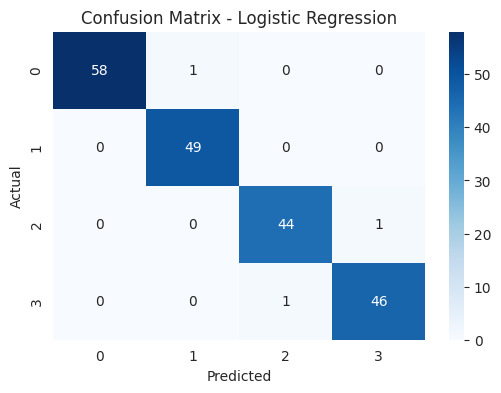

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        49
           2       0.98      0.98      0.98        45
           3       0.98      0.98      0.98        47

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200



In [ ]:
# Melatih model Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_Train)

# Confusion matrix untuk data testing dengan Logistic Regression
cm_test_lr = confusion_matrix(y_Test, lr_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_Test, lr_pred))

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train,y_Train)

KNeighborsClassifier(n_neighbors=10)

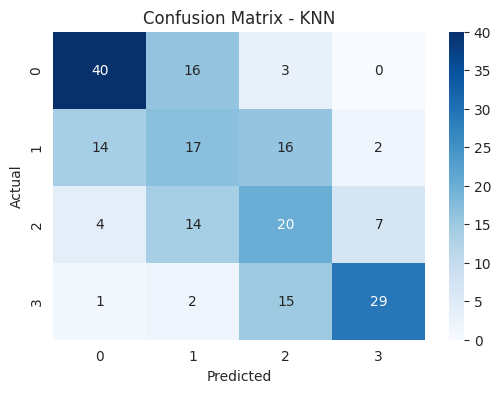

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        59
           1       0.35      0.35      0.35        49
           2       0.37      0.44      0.40        45
           3       0.76      0.62      0.68        47

    accuracy                           0.53       200
   macro avg       0.54      0.52      0.53       200
weighted avg       0.55      0.53      0.54       200



In [ ]:
# Prediksi hasil untuk data testing
pred = knn.predict(x_test)

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_Test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(classification_report(y_Test, pred))

# **SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC(random_state=1)
svm.fit(x_train,y_Train)

SVC(random_state=1)

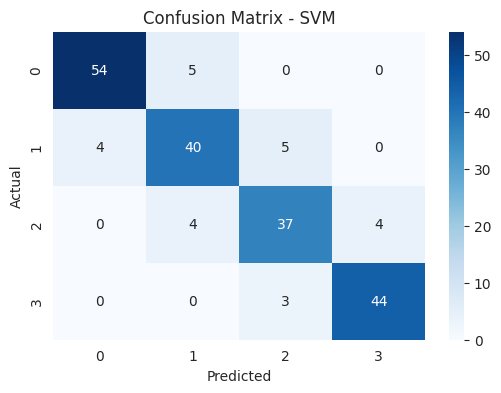

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.82      0.82      0.82        49
           2       0.82      0.82      0.82        45
           3       0.92      0.94      0.93        47

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



In [ ]:
# Menghitung akurasi model SVM
svm_accuracy = svm.score(x_test, y_Test)

# Prediksi hasil untuk data testing
svm_pred = svm.predict(x_test)

# Confusion matrix untuk data testing
cm_test = confusion_matrix(y_Test, svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_Test, svm_pred))

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

nb=GaussianNB()
nb1=BernoulliNB()

In [ ]:
nb.fit(x_train,y_Train)
nb1.fit(x_train,y_Train)

BernoulliNB()

In [ ]:
print("GaussianNB accuracy:", nb.score(x_test,y_Test))
print("BernoulliNB accuracy:", nb1.score(x_test,y_Test))

GaussianNB accuracy: 0.825
BernoulliNB accuracy: 0.59


              precision    recall  f1-score   support

           0       0.92      0.95      0.93        59
           1       0.89      0.69      0.78        49
           2       0.66      0.84      0.74        45
           3       0.86      0.79      0.82        47

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.84      0.82      0.83       200



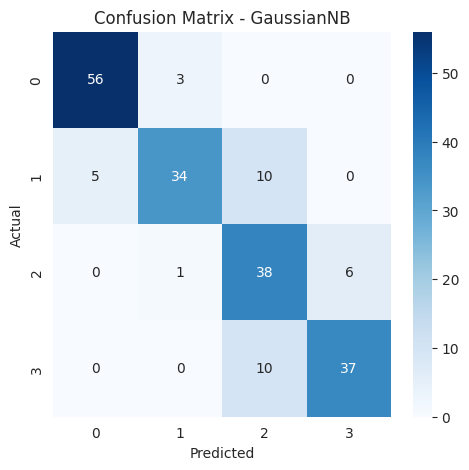

In [ ]:
# Menghitung akurasi model GaussianNB
gaussian_nb_accuracy = nb.score(x_test, y_Test)

# Confusion matrix untuk data testing dengan GaussianNB
cm_test_gaussian = confusion_matrix(y_Test, gaussian_nb_pred)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_test_gaussian, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')


print(classification_report(y_Test, gaussian_nb_pred))

BernoulliNB accuracy: 0.59
BernoulliNB Recall:  0.59
BernoulliNB Precision:  0.5759321110053388


Text(321.26767676767673, 0.5, 'Actual')

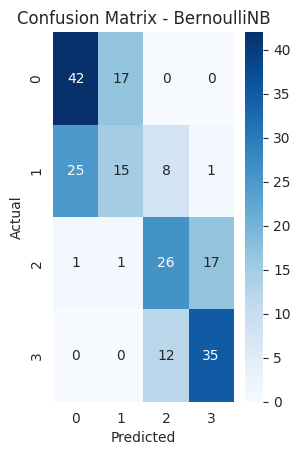

In [ ]:
# Menghitung akurasi model BernoulliNB
bernoulli_nb_accuracy = nb1.score(x_test, y_Test)
print("BernoulliNB accuracy:", bernoulli_nb_accuracy)

# Prediksi hasil untuk data testing menggunakan BernoulliNB
bernoulli_nb_pred = nb1.predict(x_test)

# Menghitung recall score dan precision score
bernoulli_nb_recall = recall_score(y_Test, bernoulli_nb_pred, average='weighted')
bernoulli_nb_precision = precision_score(y_Test, bernoulli_nb_pred, average='weighted')

print("BernoulliNB Recall: ", bernoulli_nb_recall)
print("BernoulliNB Precision: ", bernoulli_nb_precision)

# Confusion matrix untuk data testing dengan BernoulliNB
cm_test_bernoulli = confusion_matrix(y_Test, bernoulli_nb_pred)
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_bernoulli, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - BernoulliNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train,y_Train)

DecisionTreeClassifier()

In [ ]:
print("Decision Tree Classifier Accuracy: ", dt.score(x_test,y_Test))

Decision Tree Classifier Accuracy:  0.85


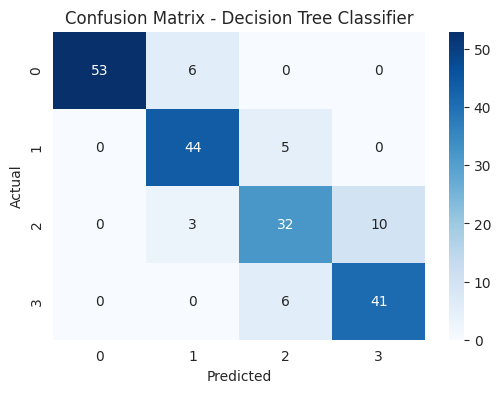

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        59
           1       0.83      0.90      0.86        49
           2       0.74      0.71      0.73        45
           3       0.80      0.87      0.84        47

    accuracy                           0.85       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.85      0.85       200



In [ ]:
# Menghitung akurasi model Decision Tree Classifier
dt_accuracy = dt.score(x_test, y_Test)

# Confusion matrix untuk data testing dengan Decision Tree Classifier
cm_test_dt = confusion_matrix(y_Test, dt_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(classification_report(y_Test, dt_pred))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
rf.fit(x_train,y_Train)

RandomForestClassifier(random_state=1)

In [ ]:
print("Random Forest Accuracy: ", rf.score(x_test,y_Test))

Random Forest Accuracy:  0.895


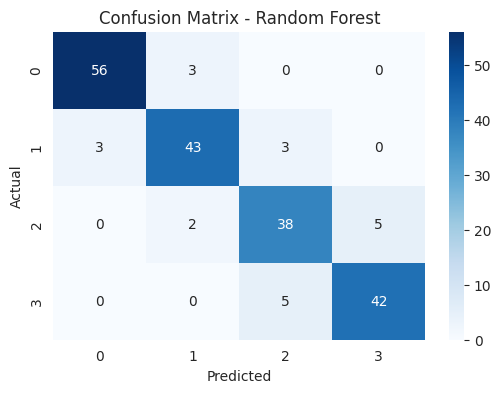

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.90      0.88      0.89        49
           2       0.83      0.84      0.84        45
           3       0.89      0.89      0.89        47

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



In [ ]:
# Menghitung akurasi model Random Forest
rf_accuracy = rf.score(x_test, y_Test)

# Confusion matrix untuk data testing dengan Random Forest
cm_test_rf = confusion_matrix(y_Test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(classification_report(y_Test, rf_pred))

# **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier

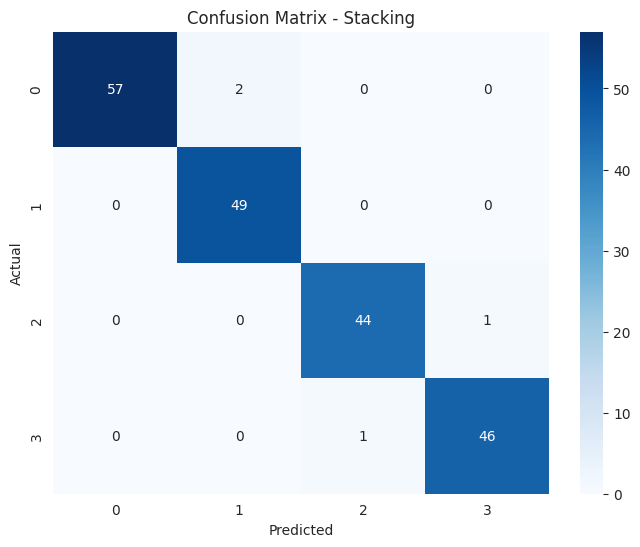

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.96      1.00      0.98        49
           2       0.98      0.98      0.98        45
           3       0.98      0.98      0.98        47

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression()),
    ('nb', GaussianNB())
]

# Inisialisasi model meta
meta_model = LogisticRegression()

# Inisialisasi dan melatih model Stacking
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)
stacking_model.fit(x_train, y_Train)


# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking')
plt.show()

print(classification_report(y_Test, y_pred))